In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lh_days = pd.read_csv('/content/hormone_readings_one_row_per_cycle_all_indexing.csv')
lh_days.head()

,Unnamed: 0,hub_id,cycle_index,cycle_length,cycle_status,max_LH_day,max_LH_day_bw,day0_LH,day1_LH,day2_LH,...,day13_fromlh_PDG,day14_fromlh_PDG,day15_fromlh_PDG,day16_fromlh_PDG,day17_fromlh_PDG,day18_fromlh_PDG,day19_fromlh_PDG,day20_fromlh_PDG,day21_fromlh_PDG,day22_fromlh_PDG
0,0,U31A85B17754165,38.0,27,1,12.0,-15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,U31ACD017757060,27.0,32,1,18.0,-14.0,4.58,1.04,0.99,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,U30B73D17521163,11.0,28,1,17.0,-11.0,3.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,U30FA5017574260,5.0,30,1,13.0,-17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,U31ACD017757060,36.0,30,1,13.0,-17.0,2.79,2.27,2.38,...,10.7,20.225,21.64,8.12,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def get_max_LH_value(row):
    max_day = int(row['max_LH_day'] )
    column_name = f'day{max_day}_LH'
    return row[column_name]

In [6]:
lh_days['max_LH_value'] = lh_days.apply(get_max_LH_value, axis=1)
lh_days[['hub_id','max_LH_value','cycle_index']].head()

,hub_id,max_LH_value,cycle_index
0,U31A85B17754165,52.28,38.0
1,U31ACD017757060,5.33,27.0
2,U30B73D17521163,16.68,11.0
3,U30FA5017574260,22.33,5.0
4,U31ACD017757060,8.58,36.0


In [10]:
# make a dictionary map hub id to date/age
dictionary_age = pd.read_csv('/content/user_dictionary_per_user_cycle.csv')
dictionary_age

,hub_id,cycle_index,date_of_birth,age_in_months
0,U2921516,0,01/1986,392
1,U2921516,1,01/1986,393
2,U2921516,2,01/1986,394
3,U2921516,3,01/1986,395
4,U2921516,4,01/1986,396
...,...,...,...,...
44767,UD5E9E4230202,32,04/1987,425
44768,UD5E9E4230202,33,04/1987,427
44769,UD5E9E4230202,34,04/1987,428
44770,UD5E9E4230202,35,04/1987,429


In [18]:
merged_df = pd.merge(lh_days, dictionary_age[['hub_id', 'cycle_index', 'age_in_months']], on=['hub_id', 'cycle_index'], how='left')
merged_df = merged_df[['hub_id','cycle_index','max_LH_value','age_in_months']]
merged_df.head()

,hub_id,cycle_index,max_LH_value,age_in_months
0,U31A85B17754165,38.0,52.28,390
1,U31ACD017757060,27.0,5.33,406
2,U30B73D17521163,11.0,16.68,456
3,U30FA5017574260,5.0,22.33,418
4,U31ACD017757060,36.0,8.58,416


In [ ]:
plt.scatter(merged_df['age_in_months'],merged_df['max_LH_value'])
plt.xlabel('Age (months)')
plt.ylabel('Maximum LH value')
plt.title('Maximum Cycle LH Values for Baseline Users')
plt.show()

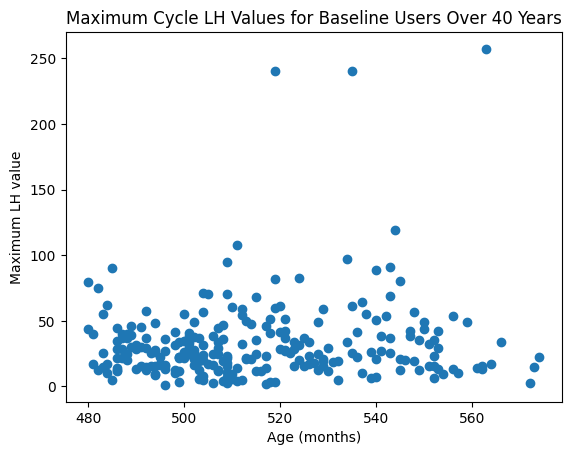

In [26]:
users_over_40_years = merged_df[merged_df['age_in_months'] >= 40 * 12]
plt.scatter(users_over_40_years['age_in_months'],users_over_40_years['max_LH_value'])
plt.xlabel('Age (months)')
plt.ylabel('Maximum LH value')
plt.title('Maximum Cycle LH Values for Baseline Users Over 40 Years')
plt.show()

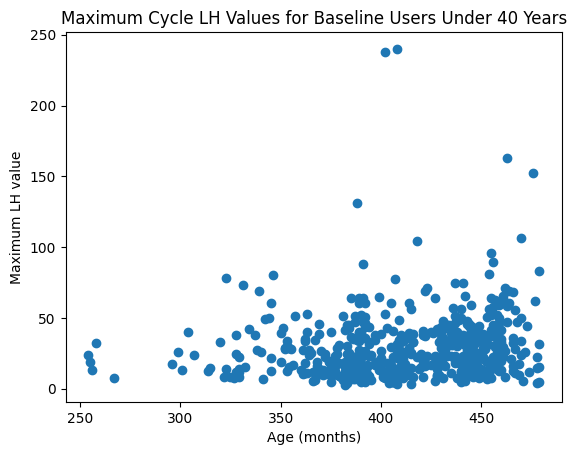

In [28]:
users_under_40_years = merged_df[merged_df['age_in_months'] < 40*12]
plt.scatter(users_under_40_years['age_in_months'],users_under_40_years['max_LH_value'])
plt.xlabel('Age (months)')
plt.ylabel('Maximum LH value')
plt.title('Maximum Cycle LH Values for Baseline Users Under 40 Years')
plt.show()